In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) 

In [2]:
def get_forgetting_counts(sparsity):
    indicies = np.load('sgm_results/test_indicies' + str(sparsity) + '.npy')
    accuracy = np.load('sgm_results/test_accuracies' + str(sparsity) + '.npy')

#     print(indicies.shape)
#     print(accuracy.shape)

    indicies = indicies[1:]
    accuracy = accuracy[1:]

#     print(indicies.shape)
#     print(accuracy.shape)

    ind = indicies[-1]
    acc = accuracy[-1]

#     print(ind)
#     print(acc)

    accuracy_sorted = []
    indicies_sorted = []

    for epoch in range(indicies.shape[0]):
      ind = indicies[epoch]
      acc = accuracy[epoch]

      accsorted = acc[ind.argsort()]
      indsorted = sorted(ind)

      accuracy_sorted.append(accsorted)
      indicies_sorted.append(indsorted)

    accuracy_sorted = np.array(accuracy_sorted)
    indicies_sorted = np.array(indicies_sorted)

    accuracy_sorted.shape

    forgetting_counts = np.zeros(50000)
    for example in range(indicies.shape[1]):
      previous = None
      count = 0
      for epoch in range(indicies.shape[0]):
        current = accuracy_sorted[epoch][example]
        if previous == 1 and current == 0:
          count += 1
        previous = current
      forgetting_counts[example] = count
    
#     print(forgetting_counts)

    max_forget = max(forgetting_counts)
    max_forget

    unique, counts = np.unique(forgetting_counts, return_counts=True)

#     print(np.asarray((unique, counts)).T)

    all_zero = []
    for example in range(indicies.shape[1]):
      oneflag = False
      for epoch in range(indicies.shape[0]):
        current = accuracy_sorted[epoch][example]
        if current == 1:
          oneflag = True

      if not oneflag:
        all_zero.append(example)


#     print(all_zero)
#     print(len(all_zero))

    for i in all_zero:
      forgetting_counts[i] = 200
    
    all_one = []
    for example in range(indicies.shape[1]):
      zeroflag = False
      for epoch in range(indicies.shape[0]):
        current = accuracy_sorted[epoch][example]
        if current == 0:
          zeroflag = True

      if not oneflag:
        all_one.append(example)
    

    print(all_one)
    print(len(all_one))

    for i in all_zero:
      forgetting_counts[i] = 200
    
    
    for i in all_one:
      forgetting_counts[i] = -1
    
    return forgetting_counts, unique, counts

In [3]:

forgetting_counts_one, unique_one, counts_one = get_forgetting_counts(0.051)
forgetting_counts_two, unique_two, counts_two = get_forgetting_counts(0.075)
forgetting_counts_three, unique_three, counts_three = get_forgetting_counts(0.101)

[]
0
[]
0
[]
0


In [4]:
forgetting_counts_four, unique_four, counts_four = get_forgetting_counts(0.125)
forgetting_counts_five, unique_five, counts_five = get_forgetting_counts(0.151)
forgetting_counts_six, unique_six, counts_six = get_forgetting_counts(0.175)
forgetting_counts_seven, unique_seven, counts_seven = get_forgetting_counts(0.2)

[]
0
[]
0
[]
0
[]
0


In [93]:
forgetting_counts_six, unique_six, counts_six = get_forgetting_counts(0.101)
forgetting_counts_seven, unique_seven, counts_seven = get_forgetting_counts(0.151)

[]
0
[]
0


In [103]:
forgetting_counts_eight, unique_eight, counts_eight = get_forgetting_counts(0.075)
forgetting_counts_nine, unique_nine, counts_nine = get_forgetting_counts(0.051)

[]
0
[]
0


In [8]:
print(len(unique_three))

17


In [69]:
print(unique_one)
print(counts_one)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 21.
 23.]
[ 808 3033 6590 9297 9615 8127 5710 3535 1824  845  403  120   55   21
   12    1    1    1    2]


In [19]:
one_missing = []
two_missing = []
three_missing = []


for i in range(int(max(unique_one))):
    if i not in unique_one:
        one_missing.append(i)
        
    if i not in unique_two:
        two_missing.append(i)
        
    if i not in unique_three:
        three_missing.append(i)


print(one_missing, max(unique_one))
print(two_missing, max(unique_two))
print(three_missing, max(unique_three))

[17, 18, 19, 20, 22] 23.0
[17, 18, 19, 20, 21, 22] 16.0
[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22] 8.0


In [5]:
def extend_to_len(ind, count, n):
    n = int(n)
    new_count = [0] * (n + 1)
    for i in range(len(ind)):
        new_count[int(ind[i])] = count[i]
    
    new_ind = [*range(0, n + 1)]
    return new_ind, new_count

# print(unique_one)
# new_ind, new_count = extend_to_len(unique_one, counts_one, max(unique_one))

# print(new_ind)
# print(new_count)

In [6]:
unique_one, counts_one = extend_to_len(unique_one, counts_one, max(unique_one))
unique_two, counts_two = extend_to_len(unique_two, counts_two, max(unique_one))
unique_three, counts_three = extend_to_len(unique_three, counts_three, max(unique_one))
unique_four, counts_four = extend_to_len(unique_four, counts_four, max(unique_one))
unique_five, counts_five = extend_to_len(unique_five, counts_five, max(unique_one))
unique_six, counts_six = extend_to_len(unique_six, counts_six, max(unique_one))
unique_seven, counts_seven = extend_to_len(unique_seven, counts_seven, max(unique_one))
# unique_eight, counts_eight = extend_to_len(unique_eight, counts_eight, max(unique_one))
# unique_nine, counts_nine = extend_to_len(unique_nine, counts_nine, max(unique_one))

In [7]:
print(len(unique_one))
print(counts_one)
print(counts_two)
print(counts_three)
print(counts_four)
print(counts_five)
print(counts_six)
print(counts_seven)


11
[11055, 16672, 12673, 6348, 2322, 715, 184, 23, 5, 1, 2]
[13355, 17885, 11612, 5100, 1530, 402, 91, 22, 2, 1, 0]
[14876, 18282, 10910, 4347, 1261, 265, 45, 12, 2, 0, 0]
[15911, 18441, 10603, 3730, 1051, 218, 37, 7, 2, 0, 0]
[16414, 18575, 10146, 3646, 958, 222, 34, 5, 0, 0, 0]
[16994, 18535, 9948, 3415, 893, 176, 34, 5, 0, 0, 0]
[17333, 18509, 9874, 3253, 838, 163, 27, 2, 1, 0, 0]


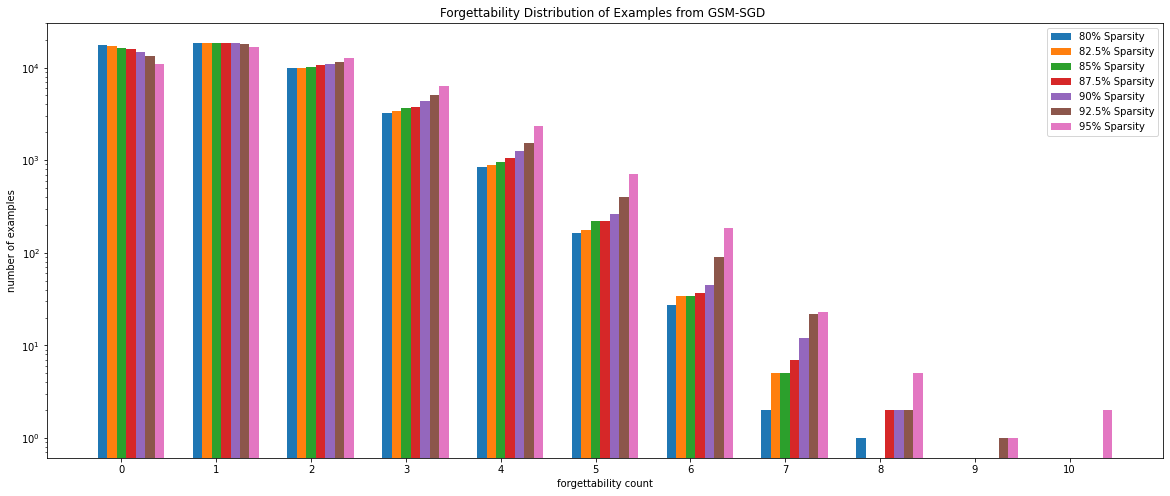

In [142]:
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
import math

x_axis = np.arange(len(unique_one))
plt.rcParams["figure.figsize"] = (20,8)

width = 0.10

plt.yscale("log")
plt.bar(x_axis - width - width, counts_seven, width=width, label = '80% Sparsity')
plt.bar(x_axis - width, counts_six, width=width, label = '82.5% Sparsity')
plt.bar(x_axis, counts_five, width=width, label = '85% Sparsity')
plt.bar(x_axis + width, counts_four, width=width, label = '87.5% Sparsity')
plt.bar(x_axis + width + width, counts_three, width=width, label = '90% Sparsity')
plt.bar(x_axis + width + width + width, counts_two, width=width, label = '92.5% Sparsity')
plt.bar(x_axis + width + width + width + width, counts_one, width=width, label = '95% Sparsity')



# plt.plot(x_axis, counts_five, label = '80% Sparsity')
# plt.plot(x_axis, counts_four, label = '82.5% Sparsity')
# plt.plot(x_axis, counts_three, label = '85% Sparsity')
# # plt.bar(x_axis + width, counts_two, width=width, label = '87.5% Sparsity')
# plt.plot(x_axis, counts_one, label = '90% Sparsity')


# plt.xticks(x_axis.astype(int), unique_one)
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

new_list = range(math.floor(min(unique_one)), math.ceil(max(unique_one))+1)
plt.xticks(new_list)

plt.legend()

plt.xlabel('forgettability count')
plt.ylabel('number of examples')
plt.title('Forgettability Distribution of Examples from GSM-SGD ')
plt.savefig("sgmlog.jpeg")


plt.show()



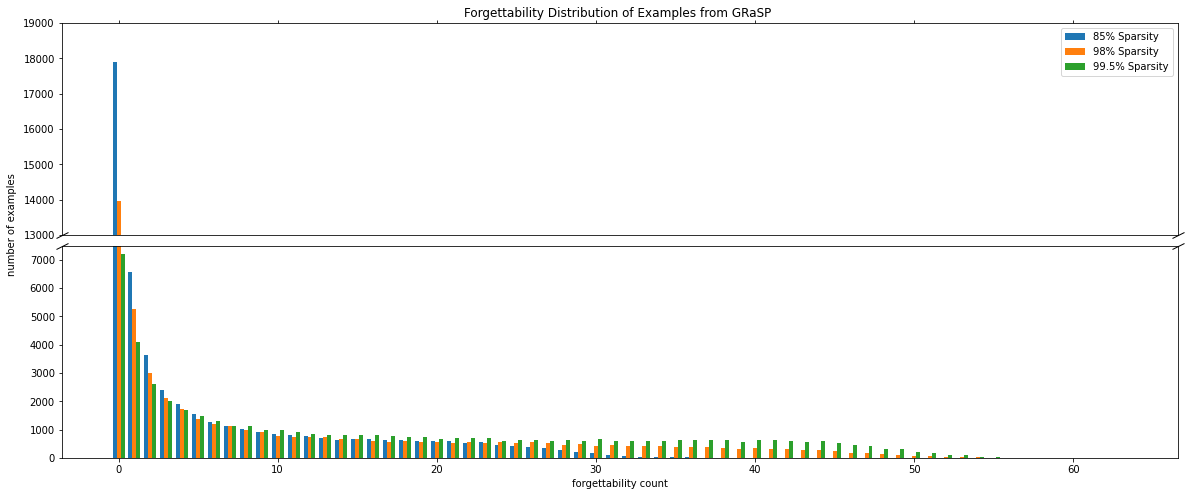

In [192]:
import numpy as np
import matplotlib.pyplot as plt

# Now let's make two outlier points which are far away from everything.

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes

ax1.bar(x_axis - width, counts_three, width=width, label = '85% Sparsity')
ax1.bar(x_axis, counts_two, width=width, label = '98% Sparsity')
ax1.bar(x_axis + width, counts_one, width=width, label = '99.5% Sparsity')
ax2.bar(x_axis - width, counts_three, width=width, label = '85% Sparsity')
ax2.bar(x_axis, counts_two, width=width, label = '98% Sparsity')
ax2.bar(x_axis + width, counts_one, width=width, label = '99.5% Sparsity')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(13000, 19000)  # outliers only
ax2.set_ylim(0, 7500)  # most of the data

# hide the spines between ax and ax2
# ax1.spines.bottom.set_visible(False)
# ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.legend()

ax1.yaxis.set_label_coords(-0.04,0.05)
plt.xlabel('forgettability count')
ax1.set_ylabel('number of examples')
ax1.set_title('Forgettability Distribution of Examples from GRaSP ')
plt.savefig("grasp.jpeg")

plt.show()

In [168]:
len(counts_three)
len(counts_three)
len(counts_three)

62

In [171]:
max(unique_three)

42.0

In [188]:
print(unique_one)
print(counts_one)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0]
[7188, 4104, 2603, 2009, 1674, 1480, 1303, 1131, 1132, 996, 979, 909, 828, 797, 789, 799, 822, 754, 737, 726, 679, 701, 713, 707, 595, 635, 623, 594, 626, 609, 647, 579, 600, 602, 598, 628, 622, 642, 626, 575, 634, 619, 602, 574, 584, 521, 457, 401, 322, 296, 202, 163, 104, 85, 32, 21, 8, 6, 3, 2, 2, 0, 0, 1]


In [180]:
unique_one = sorted(np.append(unique_one, [61, 62]))

In [182]:
counts_one = list(counts_one)

In [183]:
counts_one.pop()

1

In [187]:
counts_one.append(1)

In [200]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = forgetting_counts_two
data2 = forgetting_counts_three
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.739


In [196]:
large_forgetting_counts

NameError: name 'large_forgetting_counts' is not defined

In [121]:
import pickle
with open('cifar10_sorted_fulldata.pkl', 'rb') as f:
    forget = pickle.load(f)

In [122]:
forget

{'indices': array([10538, 32125, 40142, ..., 32791, 18470, 47111]),
 'forgetting counts': array([ 0,  0,  0, ..., 34, 34, 34])}

In [123]:
forget_forgetting_counts_sorted = forget['forgetting counts'][forget['indices'].argsort()]
forget_indsorted = sorted(forget['indices'])

In [8]:
import pandas as pd

d = pd.DataFrame()

In [9]:
# d['forget'] = forget_forgetting_counts_sorted 
d['80'] = forgetting_counts_seven
d['82.5'] = forgetting_counts_six
d['85'] = forgetting_counts_five
d['87.5'] = forgetting_counts_four
d['90'] = forgetting_counts_three
d['92.5'] = forgetting_counts_two
d['95'] = forgetting_counts_one

In [10]:
d

,80,82.5,85,87.5,90,92.5,95
0,1.0,2.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [171]:
from sklearn.metrics import mean_squared_error

mean_squared_error(d['forget'],d['85'])

69.97104

In [12]:
d.corr()

,80,82.5,85,87.5,90,92.5,95
80,1.000000,0.020882,0.027615,0.020454,0.025848,0.018863,0.025461
82.5,0.020882,1.000000,0.026773,0.015707,0.020435,0.030592,0.022055
85,0.027615,0.026773,1.000000,0.029739,0.023927,0.025351,0.030596
87.5,0.020454,0.015707,0.029739,1.000000,0.021787,0.034462,0.039383
90,0.025848,0.020435,0.023927,0.021787,1.000000,0.023323,0.028313
92.5,0.018863,0.030592,0.025351,0.034462,0.023323,1.000000,0.025689
95,0.025461,0.022055,0.030596,0.039383,0.028313,0.025689,1.000000


In [14]:
d.corr('kendall')

,80,82.5,85,87.5,90,92.5,95
80,1.000000,0.015106,0.019587,0.018276,0.022598,0.014724,0.018240
82.5,0.015106,1.000000,0.021050,0.011370,0.016449,0.027245,0.018623
85,0.019587,0.021050,1.000000,0.023744,0.020068,0.017598,0.019501
87.5,0.018276,0.011370,0.023744,1.000000,0.017817,0.026612,0.028519
90,0.022598,0.016449,0.020068,0.017817,1.000000,0.019810,0.021246
92.5,0.014724,0.027245,0.017598,0.026612,0.019810,1.000000,0.020866
95,0.018240,0.018623,0.019501,0.028519,0.021246,0.020866,1.000000


In [177]:
f = ""
a = ['0.00', '0.80', '0.825', '0.85', '0.875', '0.90', '0.925', '0.95']
for j in range(8):
    f += str(a[j]) + ' & '
    for x in d.corr():
        z = d.corr()[x][j]
        z = round(z, 3)
        f += (str(z) + ' & ')
    f = f[:-2]
    f += '\\\\ \n \hline \n'

print(f)

0.00 & 1.0 & 0.008 & 0.01 & 0.012 & 0.02 & 0.005 & 0.01 & 0.011 \\ 
 \hline 
0.80 & 0.008 & 1.0 & 0.021 & 0.028 & 0.02 & 0.026 & 0.019 & 0.025 \\ 
 \hline 
0.825 & 0.01 & 0.021 & 1.0 & 0.027 & 0.016 & 0.02 & 0.031 & 0.022 \\ 
 \hline 
0.85 & 0.012 & 0.028 & 0.027 & 1.0 & 0.03 & 0.024 & 0.025 & 0.031 \\ 
 \hline 
0.875 & 0.02 & 0.02 & 0.016 & 0.03 & 1.0 & 0.022 & 0.034 & 0.039 \\ 
 \hline 
0.90 & 0.005 & 0.026 & 0.02 & 0.024 & 0.022 & 1.0 & 0.023 & 0.028 \\ 
 \hline 
0.925 & 0.01 & 0.019 & 0.031 & 0.025 & 0.034 & 0.023 & 1.0 & 0.026 \\ 
 \hline 
0.95 & 0.011 & 0.025 & 0.022 & 0.031 & 0.039 & 0.028 & 0.026 & 1.0 \\ 
 \hline 



In [182]:
a=d.loc[d['80'] == 5]

In [183]:
print(len(a))

163


In [184]:
s = a.sum(axis=0)/len(a)

s

forget    5.944785
80        5.000000
82.5      1.233129
85        1.245399
87.5      1.386503
90        1.325153
92.5      1.429448
95        1.576687
dtype: float64

In [190]:
def get_avg_forgettability(value):
    a=d.loc[d['80'] == value]
    s = a.sum(axis=0)/len(a)
    return(s[2:])

get_avg_forgettability(0)

82.5    1.049328
85      1.069751
87.5    1.097733
90      1.166907
92.5    1.280909
95      1.476490
dtype: float64

In [366]:
def get_avg_forgettability(value):
    a=d.loc[ (d['forget'] >= value) & (d['forget'] < value + 5) ]
    s = a.sum(axis=0)/len(a)
    return(s[1:])

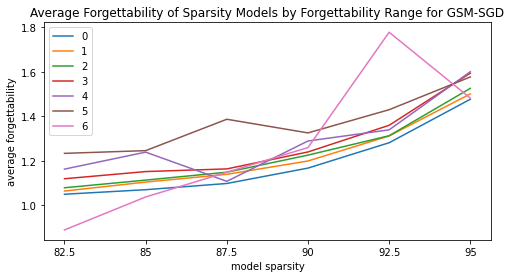

In [203]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 4)

for i in [0,1,2,3,4,5,6]:
    plt.plot(['82.5', '85', '87.5', '90', '92.5', '95'], get_avg_forgettability(i), label=str(i))


plt.legend(loc='upper left')
plt.xlabel("model sparsity")
plt.ylabel("average forgettability")
plt.title("Average Forgettability of Sparsity Models by Forgettability Range for GSM-SGD")
plt.savefig("gsmsgdforget.jpeg")


plt.show()

In [197]:
def get_stddev_forgettability(value):
    a=d.loc[ (d['forget'] >= value) & (d['forget'] < value + 5) ]
    s = a.std(axis=0)
    return(s[2:])

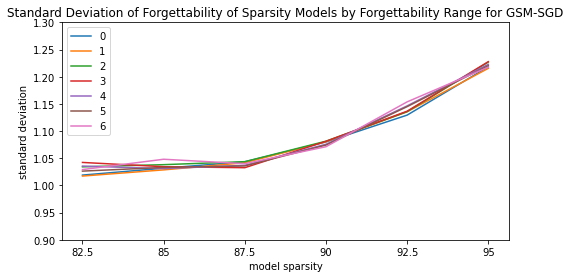

In [204]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 4)

for i in [0,1,2,3,4,5,6]:
    plt.plot(['82.5', '85', '87.5', '90', '92.5', '95'], get_stddev_forgettability(i), label=str(i))


plt.legend(loc='upper left')
plt.xlabel("model sparsity")
plt.ylabel("standard deviation")
plt.title("Standard Deviation of Forgettability of Sparsity Models by Forgettability Range for GSM-SGD")
plt.ylim([0.9, 1.3])
plt.savefig("gsmsgdforgetstddev.jpeg")


plt.show()

In [214]:
import torch
from torchvision import datasets, transforms

class TrainCifarDataset(torch.utils.data.Dataset):
    def __init__(self):
        self.cifar10 = datasets.CIFAR10('..', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.Pad(padding=(4, 4, 4, 4)),
                       transforms.RandomCrop(32),
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

    def __getitem__(self, index):
        data, target = self.cifar10[index]

        return data, target, index

    def __len__(self):
        return len(self.cifar10)

In [215]:
data = TrainCifarDataset()

0it [00:00, ?it/s]

Extracting ../cifar-10-python.tar.gz to ..


In [219]:
type(data.cifar10[1])

tuple

In [223]:
d, target = data.cifar10[0]


In [265]:
new_labels = []
for i in data.cifar10:
    new_labels.append(i[1])

In [257]:
orig_labels = labels.copy()
import random
for i in range(5000):
    a = random.randint(0, 50000)
    b = random.randint(0, 50000)
    temp = labels[a]
    labels[a] = labels[b]
    labels[b] = temp
labels

[6,
 6,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 8,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 7,
 2,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 9,
 0,
 3,
 7,
 6,
 3,
 9,
 2,
 0,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 0,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 5,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 2,
 1,
 3,
 1,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 2,
 1,
 1,
 7,
 1,
 8,
 3,
 2,
 6,
 9,
 1,
 4,
 5,
 1,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 8,
 9,
 1,
 2,
 4,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 6,
 6,
 7,
 1,
 8,
 1,
 1,
 8,
 8,
 1,
 3,
 8,
 6,
 2,
 4,
 9,
 1,
 5,
 4,
 3,
 6,
 7,
 4,
 3,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 0,
 5,
 1,
 3,
 9,
 2,
 7,
 4,
 5,
 4,
 1,
 1,
 7,
 3,
 4,
 7,
 5,
 5,
 0,
 0,
 9,
 3,
 9,
 0,
 0,
 7,
 8,
 0,
 2,
 5,
 2,
 3,
 5,
 2,
 6,
 6,
 8,
 3,
 6,
 9,
 1,
 9,
 7,
 6,
 9,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 3,
 9,
 0,
 8,
 2,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 9,


In [266]:
labels = np.array(labels)
orig_labels = np.array(orig_labels)
new_label = np.array(new_labels)

In [267]:
np.sum(new_labels)

225000

In [260]:
np.sum(orig_labels)

225000

In [268]:
np.sum(labels==new_labels)

41887

In [262]:
labels

array([6, 6, 9, ..., 9, 1, 1])

In [263]:
orig_labels

array([6, 9, 9, ..., 9, 1, 1])

In [243]:
a = random.randint(0, 50000)
b = random.randint(0, 50000)
print(a, b)

18323 17189


In [269]:
new_labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,
